# Análise de redes

_Rede_ (_network_) é uma forma de organizar e representar dados discretos. Elas diferem da forma tabular, em que linhas e colunas são as estruturas fundamentais, e funcionam com base em dois conceitos:

1. _entidades_, ou _atores_, ou ainda _nós_, e
2. _relacionamentos_, ou _links_, ou _arcos_, ou ainda, _conexões_.

Casualmente, o conceito de _rede_ se confunde com o conceito matemático de _grafo_, para o qual as entidades são chamadas _vértices_ e os relacionamentos _arestas_. Usa-se a notação $G(V,E)$ para designar um grafo genérico $G$ com um conjunto $V$ de vértices e um conjunto $E$ de arestas. A Fig. {numref}`random-graph` esboça um grafo genérico.
```{figure} ../figs/17/random-graph.png
---
width: 500px
name: random-graph
---
Grafo genérico contendo 6 vértices e 13 arestas.
```

## Redes complexas

Com o barateamento dos recursos de computação no final do século XX, a _análise de redes complexas_ (do inglês _complex network analysis_, ou CNA) evoluiu como uma área de pesquisa independente. Desde então, tornou-se possível mapear bancos de dados enormes e extrair conhecimento a partir de um emaranhado complexo de interligações. 

No século XXI, percebemos um interesse explosivo em CNA. Algumas aplicações modernas incluem, mas não se limitam a:

- transporte, para planejamento de malhas ferroviárias, rodovias e conexões entre cidades;
- sociologia, para entender pessoas, seu comportamento, interação em redes sociais, orientações de pensamento e preferências;
- energia, para sistematizar linhas de transmissão de energia elétrica;
- biologia, para modelar redes de transmissão de doenças infecciosas;
- ciência, para encontrar os núcleos de pesquisa mais influentes do mundo em um determinado campo do conhecimento. 


## O módulo `networkx`

Neste capítulo, introduziremos alguns conceitos relacionados à CNA, tais como componentes conexas, medidades de centralidade e visualização de grafos usando o módulo Python `networkx`. Este módulo tornou-se popular pela sua versatilidade. Alguns de seus pontos positivos são:

- facilidade de instalação;
- ampla documentação no [site oficial](https://networkx.org);
- extenso conjunto de funções e algoritmos;
- versatilidade para lidar com redes de até 100.000 nós.

```{note}
Algumas ferramentas com potencial similar ao `networkx` são [`igraph`](https://igraph.org) e [`graph-tool`](https://graph-tool.skewed.de). Especificamente para visualização, você poderá se interessar pelo [`Graphviz`](https://www.graphviz.org) ou pelo [`Gephi`](https://gephi.org).
```

Vamos praticar um pouco com este módulo para entender conceitos fundamentais. Em seguida, faremos uma aplicação. Supondo que você já tenha instalado o `networkx`, importe-o:

In [1]:
import networkx as nx

### Criação de grafos não dirigidos

Em seguida vamos criar um grafo $G$ _não dirigido_. Isso significa que o sentido da aresta é irrelevante. Contudo, vale comentar que há situações em que o sentido da aresta importa. Neste caso, diz-se que o grafo é _dirigido_.

In [2]:
# cria grafo não dirigido com 4 vértices

# inicializa
G = nx.Graph() 

# adiciona arestas explicitamente
G.add_edge(1,2) 
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)

Em seguida, visualizamos o grafo com `draw_networkx`.

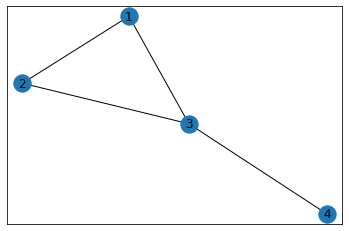

In [3]:
nx.draw_networkx(G)

### Adição e deleção de nós e arestas

Podemos adicionar nós indvidualmente ou por meio de uma lista, bem como usar _strings_ como nome.

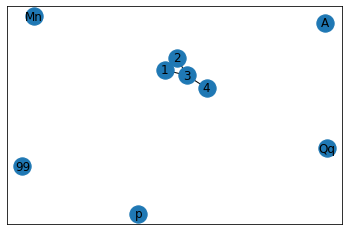

In [4]:
G.add_node('A')
G.add_nodes_from(['p',99,'Qq'])
G.add_node('Mn') # nó adicionado por engano
nx.draw_networkx(G)

Podemos fazer o mesmo com arestas sobre nós existentes ou não existentes.

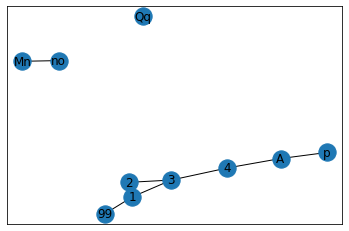

In [5]:
G.add_edge('A','p') # aresta individual
G.add_edges_from([(1,99),(4,'A')]) # aresta por lista (origem, destino)
G.add_edge('Mn','no') # 'no' não existente
nx.draw_networkx(G)

Nós e arestas podem ser removidos de maneira similar.

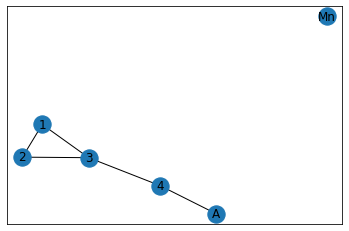

In [6]:
G.remove_node('no')
G.remove_nodes_from(['Qq',99,'p'])
nx.draw_networkx(G)

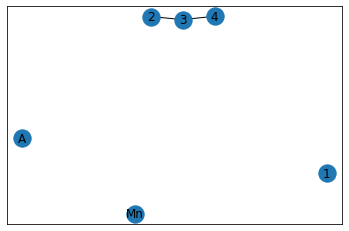

In [7]:
G.remove_edge(1,2)
G.remove_edges_from([('A',4),(1,3)])
nx.draw_networkx(G)

Para remover todas os nós e arestas do grafo, mas mantê-lo criado, usamos `clear`.

In [8]:
G.clear()

Verificamos que não há nós nem arestas:

In [9]:
len(G.nodes()), len(G.edges)

(0, 0)

Para deletá-lo completamente, podemos fazer:

In [10]:
del G

### Criação de grafos aleatórios

Podemos criar um grafo aleatório de diversas formas. Com `random_geometric_graph`, o grafo de _n_ nós uniformemente aleatórios fica restrito ao "cubo" unitário de dimensão `dim` e conecta quaisquer dois nós _u_ e _v_ cuja distância entre eles é no máximo `raio`.

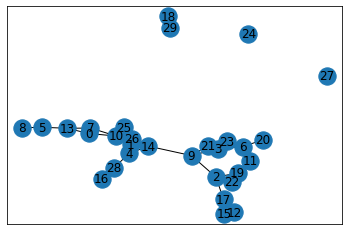

In [11]:
# 30 nós com raio de conexão 0.2
n = 30
raio = 0.2
G = nx.random_geometric_graph(n,raio,dim=2)
nx.draw_networkx(G)

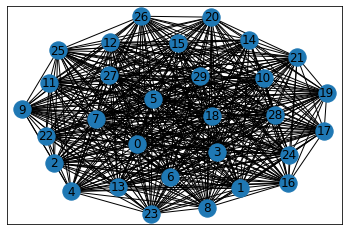

In [12]:
# 30 nós com raio de conexão 5
n = 30
raio = 5
G = nx.random_geometric_graph(n,raio,dim=2)
nx.draw_networkx(G)

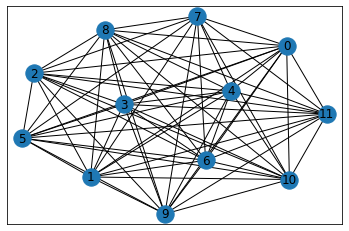

In [13]:
# 12 nós com raio de conexão 1.15
n = 12
raio = 1.15
G = nx.random_geometric_graph(n,raio,dim=2)
nx.draw_networkx(G)

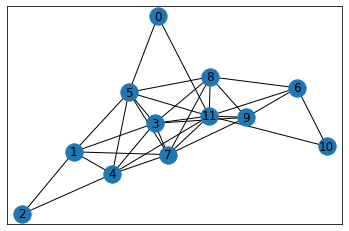

In [14]:
# 12 nós com raio de conexão 0.4
n = 12
raio = 0.4
G = nx.random_geometric_graph(n,raio,dim=2)
nx.draw_networkx(G)

### Impressão de listas de nós e de arestas

Podemos acessar a lista de nós ou de arestas com:

In [15]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [16]:
G.edges()

EdgeView([(0, 5), (0, 11), (1, 3), (1, 2), (1, 5), (1, 4), (1, 7), (2, 4), (3, 4), (3, 7), (3, 9), (3, 5), (3, 11), (3, 8), (4, 5), (4, 11), (4, 7), (5, 7), (5, 11), (5, 8), (6, 11), (6, 8), (6, 10), (6, 9), (7, 9), (7, 11), (7, 8), (8, 9), (8, 11), (9, 11), (10, 11)])

Notemos que as arestas são descritas por meio de tuplas (_origem_,_destino_).

Se especificarmos `data=True`, atributos adicionais são impressos. Para os nós, vemos `pos` como a posição espacial.

In [17]:
print(G.nodes(data=True))

[(0, {'pos': [0.14016708535353195, 0.6030612677990583]}), (1, {'pos': [0.7551166126779706, 0.5753984722722648]}), (2, {'pos': [0.587815560861345, 0.9262306002179045]}), (3, {'pos': [0.6481883004357897, 0.23944971393177616]}), (4, {'pos': [0.5407112650886972, 0.5928863158800595]}), (5, {'pos': [0.36356802456758663, 0.5063407090207792]}), (6, {'pos': [0.13333289318770103, 0.10093555742924487]}), (7, {'pos': [0.5880577194412443, 0.4328559322005747]}), (8, {'pos': [0.4877270706931097, 0.16480065213848483]}), (9, {'pos': [0.4864756110584624, 0.06055043228282264]}), (10, {'pos': [0.06553095561423039, 0.20127799578298156]}), (11, {'pos': [0.2821978870896149, 0.3551844724031613]})]


No caso das arestas, nenhum atributo existe para este grafo. Contudo, em grafos mais complexos, é comum ter _capacidade_ e _peso_ como atributos. Ambas são relevantes em estudos de _fluxo_, em que se associa a arestas uma "capacidade" de transporte e um "peso" de relevância.

In [18]:
print(G.edges(data=True))

[(0, 5, {}), (0, 11, {}), (1, 3, {}), (1, 2, {}), (1, 5, {}), (1, 4, {}), (1, 7, {}), (2, 4, {}), (3, 4, {}), (3, 7, {}), (3, 9, {}), (3, 5, {}), (3, 11, {}), (3, 8, {}), (4, 5, {}), (4, 11, {}), (4, 7, {}), (5, 7, {}), (5, 11, {}), (5, 8, {}), (6, 11, {}), (6, 8, {}), (6, 10, {}), (6, 9, {}), (7, 9, {}), (7, 11, {}), (7, 8, {}), (8, 9, {}), (8, 11, {}), (9, 11, {}), (10, 11, {})]


### Criação de redes a partir de arquivos

Um modo conveniente de criar redes é ler diretamente um arquivo contendo informações sobre a conectividade. O _dataset_ que usaremos a partir deste ponto em diante corresponde a uma rede representando a amizade entre usuários reais do Facebook. Cada usuário é representado por um vértice e um vínculo de amizade por uma aresta. Os dados são anônimos.

Carregamos o arquivo _.txt_ com `networkx.read_edgelist`.

In [19]:
fb = nx.read_edgelist('../database/fb_data.txt')
len(fb.nodes), len(fb.edges)

(4039, 88234)

Vemos que esta rede possui 4039 usuários e 88234 vínculos de amizade. Você pode plotar o grafo para visualizá-lo, porém pode demorar um pouco...

## Propriedades relevantes

Vejamos algumas propriedades de interesse de redes e grafos.

### Grau

O _grau_ de um nó é o número de arestas conectadas a ele. Assim, o grau médio da rede do Facebook acima pode ser calculado por:

In [20]:
fb.number_of_edges()/fb.number_of_nodes()

21.84550631344392

ou

In [21]:
fb.size()/fb.order()

21.84550631344392

Ambos os resultados mostram que cada usuário nesta rede tem pelo menos 21 amizades.

### Caminho

_Caminho_ é uma sequencia de nós conectados por arestas contiguamente. O _caminho mais curto_ em uma rede é o menor número de arestas a serem visitadas partindo de um nó de origem _u_ até um nó de destino _v_.

A seguir, plotamos um caminho formado por 20 nós.

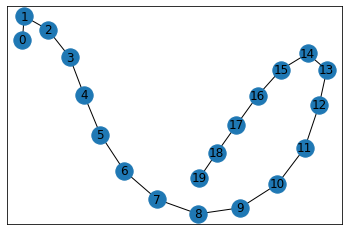

In [22]:
Gpath = nx.path_graph(20)
nx.draw_networkx(Gpath)

### Componente

Um grafo é _conexo_ se para todo par de nós, existe um caminho entre eles. Uma _componente conexa_, ou simplesmente _componente_ de um grafo é um subconjunto de seus nós tal que cada nó no subconjunto tem um caminho para todos os outros.

Podemos encontrar todas as componentes da rede do Facebook usando `connected_componentes`. Entretanto, o resultado final é um objeto _generator_. Para acessarmos as componentes, devemos usar um iterador.

In [23]:
cc = nx.connected_components(fb)

# varre componentes e imprime os primeiros 5 nós
for c in cc:
    print(list(c)[0:5])

['572', '3423', '3794', '1409', '1318']


Uma vez que há apenas uma lista impressa, temos que a rede do Facebook, na verdade, é uma componente única. De outra forma,

In [24]:
# há apenas 1 componente conexa, a própria rede
nx.number_connected_components(fb)

1

### Subgrafo

_Subgrafo_ é um subconjunto dos nós de um grafo e todas as arestas que os conectam. Para selecionarmos um _subgrafo_ da rede Facebook, usamos `subgraph`. Os argumentos necessários são: o grafo original e uma lista dos nós de interesse. Abaixo, geramos uma lista aleatória de `ng` nós.

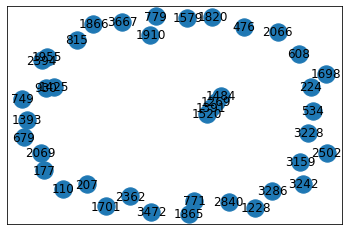

In [25]:
from numpy.random import randint

# número de nós do subgrafo
ng = 40

# identifica nós (nomes são strings)
nodes_to_get = randint(1,fb.number_of_nodes(),ng).astype(str)

# extrai subgrafo
fb_sub = nx.subgraph(fb,nodes_to_get)

# plota
nx.draw_networkx(fb_sub)

Se fizermos alguma alteração no grafo original, pode ser que o número de componentes se altere. Vejamos:

In [26]:
# copia grafo
fb_less = fb.copy()

# remove o nó '0'
fb_less.remove_node('0')

# novas componentes
nx.number_connected_components(fb_less)

19

Neste exemplo, a retirada de apenas um nó do grafo original resultou em 19 componentes, com número variável de elementos.

In [27]:
ncs = []
for c in nx.connected_components(fb_less):
    ncs.append(len(c))

In [28]:
# número de componentes em ordem
sorted(ncs,reverse=True)

[4015, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Métricas de centralidade

A _centralidade_ de um nó mede a sua importância relativa no grafo. Em outras palavras, nós mais "centrais" tendem a ser considerados os mais influentes, privilegiados ou comunicativos.

Em uma rede social, por exemplo, um usuário com alta centralidade pode ser um _influencer_, um político, uma celebridade, ou até mesmo um malfeitor. Há diversas _métricas de centralidade_ disponíveis. Aqui veremos as 4 mais corriqueiras:

- _centralidade de grau_ (_degree centrality_): definida pelo número de arestas de um nó;
- _centralidade de intermediação_(_betweeness centrality_): definida pelo número de vezes em que o nó é visitado ao tomarmos o caminho mais curto entre um par de nós distintos deste. Esta centralidade pode ser imaginada como uma "ponte" ou "pedágio".
- _centralidade de proximidade_ (_closeness centrality_): definida pelo inverso da soma das distâncias do nó de interesse a todos os outros do grafo. Ela quão "próximo" o nó é de todos os demais. Um nó com alta centralidade é aquele que, grosso modo, "dista por igual" dos demais.
- _centralidade de autovetor_ (_eigenvector centrality_): definida pelo escore relativo para um nó tomando por base suas conexões. Conexões com nós de alta centralidade aumentam seu escore, ao passo que conexões com nós de baixa centralidade reduzem seu escore. De certa forma, ela mede como um nó está conectado a nós influentes.

Em particular, um nó com alta centralidade de proximidade e alta centralidade de intermediação é chamado de _hub_.

Vamos calcular as centralidades de um subgrafo da rede do Facebook. Primeiro, extraímos um subgrafo menor.

In [35]:
# número de nós do subgrafo
ng = 400

# identifica nós (nomes são strings)
nodes_to_get = randint(1,fb.number_of_nodes(),ng).astype(str)

# extrai subgrafo
fb_sub_c = nx.subgraph(fb,nodes_to_get)

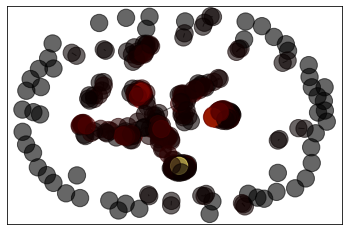

In [36]:
import matplotlib.pyplot as plt

# centralidade de grau
deg = nx.degree_centrality(fb_sub_c)
nx.draw_networkx(fb_sub_c,
                 with_labels=False,
                 node_color=list(deg.values()),
                 alpha=0.6,
                 cmap=plt.cm.afmhot)

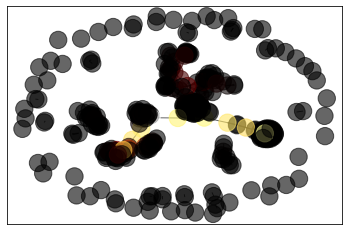

In [37]:
# centralidade de intermediação
bet = nx.betweenness_centrality(fb_sub_c)
nx.draw_networkx(fb_sub_c,
                 with_labels=False,
                 node_color=list(bet.values()),
                 alpha=0.6,
                 cmap=plt.cm.afmhot)

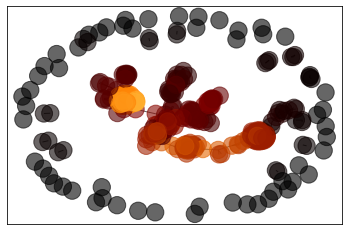

In [38]:
# centralidade de proximidade
cln = nx.closeness_centrality(fb_sub_c)
nx.draw_networkx(fb_sub_c,
                 with_labels=False,
                 node_color=list(cln.values()),
                 alpha=0.6,
                 cmap=plt.cm.afmhot)

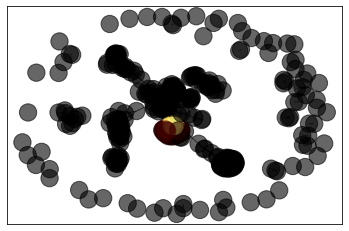

In [39]:
# centralidade de autovetor
eig = nx.eigenvector_centrality(fb_sub_c)
nx.draw_networkx(fb_sub_c,
                 with_labels=False,
                 node_color=list(eig.values()),
                 alpha=0.6,
                 cmap=plt.cm.afmhot)

## Layouts de visualização

Podemos melhorar a visualização das redes alterando os layouts. O exemplo a seguir dispõe o grafo em um layout melhor, chamado de `spring`. Este layout acomoda a posição dos nós iterativamente por meio de um algoritmo especial. Além disso, a centralidade de grau está normalizada no intervalo [0,1] e escalonada. 

Com o novo plot, é possível distinguir "comunidades", sendo os maiores nós os mais centrais.

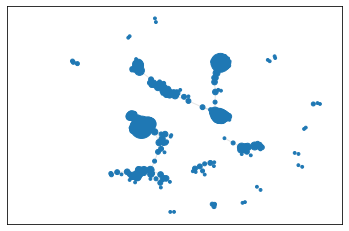

In [40]:
from numpy import array
pos_fb = nx.spring_layout(fb_sub_c,iterations = 50)

nsize = array([v for v in deg.values()])
nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb_sub_c, pos = pos_fb, node_size = nsize)
edges = nx.draw_networkx_edges(fb_sub_c, pos = pos_fb, alpha = .1)

Um layout aleatório pode ser plotado da seguinte forma:

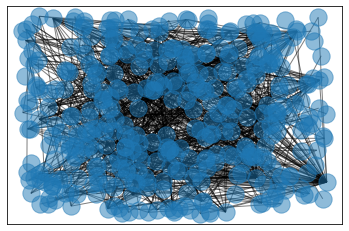

In [43]:
pos_fb = nx.random_layout(fb_sub_c)
nx.draw_networkx(fb_sub_c,pos_fb,with_labels=False,alpha=0.5)